# Feature Engineering

In [1022]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.svm import SVR

## Manual Feature Selection

In [1023]:
training = pd.read_csv('./datasets/clean_training_ames.csv', index_col=0)
test = pd.read_csv('./datasets/clean_test_ames.csv', index_col=0)

In [1069]:
list(training.columns)

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type',
 'id',
 'pid',
 'ms_subclass',
 'lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvg

In [ ]:
nominal_features = ['ms_subclass', 
                    'ms_zoning', 
                    'street', 
                    'alley', 
                    'land_contour', 
                    'lot_config',
                    'neighborhood',
                    'condition_1',
                    'condition_2',
                    'bldg_type',
                    'house_style',
                    'roof_style',
                    'roof_matl',
                    'exterior_1',
                    'exterior_2',
                    'mas_vnr_type',
                    'foundation',
                    'heating',
                    'central_air',
                    'bsmt_full_bath',
                    'bsmt_half_bath',
                    'full_bath',
                    'half_bath',
                    'bedroom',
                    'kitchen',
                    'totrmsabvgrd',
                    'fireplaces',
                    'garage_type',
                    'garage_cars',
                    'misc_feature',
                    'mo_sold',
                    'sale_type',
                    'sale_condition'
                    ]
continuous_features = ['lot_frontage', 
                       'lot_area',
                       'year_built',
                       'year_remod/add',
                       'mas_vnr_area',
                       'bsmtfin_sf_1',
                       'bsmtfin_sf_2',
                       'bsmt_unf_sf',
                       'total_bsmt_sf',
                       '1st_flr_sf',
                       '2nd_flr_sf',
                       'low_qual_fin_sf',
                       'gr_liv_area',
                       'garage_yr_blt',
                       'garage_area',
                       'wood_deck_sf',
                       'open_porch_sf',
                       'enclosed_porch',
                       '3-ssn_porch',
                       'pool_area',
                       'misc_val',
                       'yr_sold'
                       ]
oridinal_features = ['lot_shape', 
                     'utilities', 
                     'land_slope',
                     'overall_qual',
                     'overall_cond',
                     'exter_qual',
                     'exter_cond',
                     'bsmt_qual',
                     'bsmt_cond',
                     'bsmt_exposure',
                     'bsmtfin_type_1',
                     'bsmtfintype_2',
                     'heatingqc',
                     'electrical',
                     'kitchenqual'
                     'functional',
                     'fireplacequ',
                     'garage_finish',
                     'garage_qual',
                     'garage_cond',
                     'paved_drive',
                     'pool_qc',
                     'fence'
                     ]

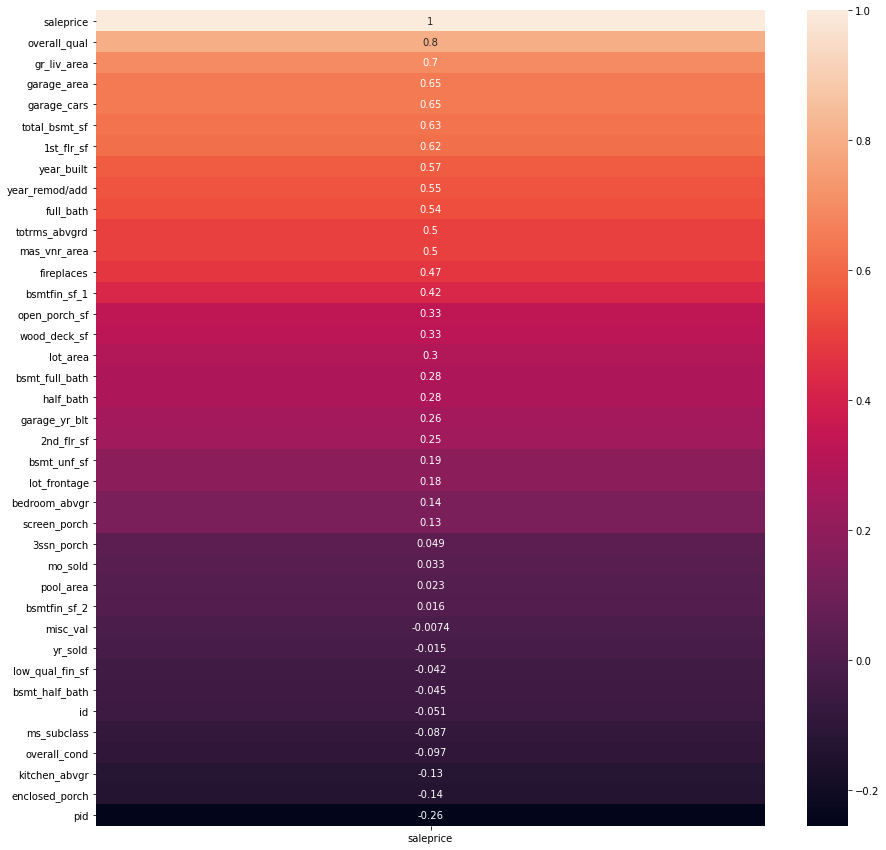

In [1024]:
plt.figure(figsize=(15, 15))
sns.heatmap(training.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True);

<AxesSubplot:xlabel='garage_area', ylabel='garage_cars'>

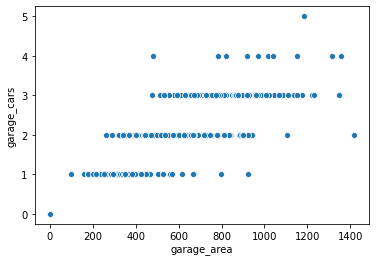

In [1025]:
sns.scatterplot(data=training, x='garage_area', y='garage_cars')

In [1026]:
features = ['overall_qual', 
            'gr_liv_area', 
            'garage_area',
            'total_bsmt_sf',
            'year_built',
            'year_remod/add',
            'full_bath',
            '1st_flr_sf',
            'totrms_abvgrd'
            
           ]
considering_features = ['foundation_PConc',]

# Linear Regression Model

In [1027]:
X = training[features]
y = training['saleprice']
test = test[features]

In [1028]:
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [1029]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pipeline and Gridsearch

In [1030]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), RFE(LinearRegression()), LinearRegression())


In [1031]:
params = {'linearregression__fit_intercept': [True, False],
          'rfe__n_features_to_select': range(1, 30)}

In [1032]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [1033]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'rfe__n_features_to_select': range(1, 30)})

In [1034]:
# Scoring the model

print('Test Score', gs.score(X_test, y_test))
print('RMSE Test', mean_squared_error(y_test, gs.predict(X_test), squared=False))
print('Training Score', gs.score(X_train, y_train))
print('RMSE Training', mean_squared_error(y_train, gs.predict(X_train), squared=False))

Test Score 0.890627932665824
RMSE Test 27453.379013033395
Training Score 0.8808058322297331
RMSE Training 26906.919241797434


In [1035]:
# Calculating best parameters

gs.best_params_

{'linearregression__fit_intercept': True, 'rfe__n_features_to_select': 23}

In [1021]:
# Creating predictions CSV
preds = gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
ames_submission_2 = pd.DataFrame(preds, index=test1['Id'])
ames_submission_2.columns = ['saleprice']

In [1036]:
# Exporting predictions CSV
ames_submission_2.to_csv('./datasets/20_ames-submission.csv')

# Lasso Regression Model

In [1037]:
# Re-reading in data
training = pd.read_csv('./datasets/clean_training_ames.csv', index_col=0)
test = pd.read_csv('./datasets/clean_test_ames.csv', index_col=0)

In [1038]:
# Assigning features and splitting into X and y.
X = training[features]
y = training['saleprice']
test = test[features]

In [1039]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Column-Transformer, Pipeline and Gridsearch

In [1040]:
#column_transformer = make_column_transformer(
#    (OneHotEncoder(),[0, -1]),
#    remainder = 'passthrough')

In [1041]:
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [1043]:
pipe = make_pipeline(StandardScaler(),
#    column_transformer,
    PolynomialFeatures(), 
    #RFE(Lasso()), 
    Lasso(max_iter=1000))


In [1044]:
params = {'lasso__alpha': [10, 20, 30, 40, 50],
          #'rfe__n_features_to_select': range(1, 30, 2)
         }

In [1045]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [1046]:
gs.fit(X_train, y_train)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4527990546.39978, tolerance: 935981909.44107
  positive)


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             n_jobs=-1, param_grid={'lasso__alpha': [10, 20, 30, 40, 50]})

In [1047]:
# Scoring the model

print('Test Score', gs.score(X_test, y_test))
print('RMSE Test', mean_squared_error(y_test, gs.predict(X_test), squared=False))
print('Training Score', gs.score(X_train, y_train))
print('RMSE Training', mean_squared_error(y_train, gs.predict(X_train), squared=False))

Test Score 0.8834858427497877
RMSE Test 28243.544006186217
Training Score 0.8838496824571961
RMSE Training 26586.781133726352


In [1048]:
# Calculating best parameters
gs.best_params_

{'lasso__alpha': 50}

In [930]:
# Creating predictions CSV
preds = gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
ames_submission_2 = pd.DataFrame(preds, index=test1['Id'])
ames_submission_2.columns = ['saleprice']

In [1049]:
# Exporting predictions CSV
ames_submission_2.to_csv('./datasets/2_lasso_ames-submission.csv')

# Ridge Regression Model

In [1059]:
training = pd.read_csv('./datasets/clean_training_ames.csv', index_col=0)
test = pd.read_csv('./datasets/clean_test_ames.csv', index_col=0)

In [1060]:
X = training[features]
y = training['saleprice']
test = test[features]

In [1061]:
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [1062]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pipeline and Gridsearch

In [1063]:
#column_transformer = make_column_transformer(
#    (OneHotEncoder(drop='first'),[0, -1]),
#    remainder = 'passthrough')

In [1064]:
pipe = make_pipeline(
    StandardScaler(),
#    column_transformer,
    PolynomialFeatures(),
    SelectKBest(f_regression),
    Ridge())


In [1065]:
params = {'selectkbest__k': [1, 40, 3],
          'ridge__alpha': range(150, 250, 10),
}

In [1066]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [1067]:
gs.fit(X_train, y_train)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fa3803b2320>)),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': range(150, 250, 10),
                         'selectkbest__k': [1, 40, 3]})

In [1068]:
# Scoring the model

print('Test Score', gs.score(X_test, y_test))
print('RMSE Test', mean_squared_error(y_test, gs.predict(X_test), squared=False))
print('Training Score', gs.score(X_train, y_train))
print('RMSE Training', mean_squared_error(y_train, gs.predict(X_train), squared=False))

Test Score 0.8742961746673305
RMSE Test 29647.431689253273
Training Score 0.8689867133950838
RMSE Training 28130.465949058173


In [715]:
# Calculating best parameters

gs.best_params_

{'ridge__alpha': 150, 'selectkbest__k': 40}

In [647]:
# Creating predictions CSV
preds = gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
ames_submission_2 = pd.DataFrame(preds, index=test1['Id'])
ames_submission_2.columns = ['saleprice']

In [648]:
# Exporting predictions CSV
ames_submission_2.to_csv('./datasets/1_ridge_ames-submission.csv')

# Elasticnet Regression Model

In [741]:
training = pd.read_csv('./datasets/clean_training_ames.csv', index_col=0)
test = pd.read_csv('./datasets/clean_test_ames.csv', index_col=0)

In [742]:
X = training[features]
y = training['saleprice']
test = test[features]

In [732]:
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [743]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pipeline and Gridsearch

In [744]:
column_transformer = make_column_transformer(
    (OneHotEncoder(drop='first'),[0, -1]),
    remainder = 'passthrough')

In [745]:
pipe = make_pipeline(column_transformer, 
                     PolynomialFeatures(), 
                     #SelectKBest(f_regression), 
                     ElasticNet())


In [746]:
params = {'elasticnet__alpha': [.01, 1, 10, 100 ],
          #'selectkbest__k': range(1, 50, 3)
         }

In [747]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [748]:
gs.fit(X_train, y_train)

ValueError: Found unknown categories [4] in column 1 during transform

In [564]:
# Scoring the model

print('Test Score', gs.score(X_test, y_test))
print('RMSE Test', mean_squared_error(y_test, gs.predict(X_test), squared=False))
print('Training Score', gs.score(X_train, y_train))
print('RMSE Training', mean_squared_error(y_train, gs.predict(X_train), squared=False))

Test Score 0.7756280396616944
RMSE Test 36174.30649442094
Training Score 0.7758503067904681
RMSE Training 37956.030521649154


In [279]:
# Calculating best parameters

gs.best_params_

{'linearregression__fit_intercept': True, 'rfe__n_features_to_select': 22}

In [280]:
# Creating predictions CSV
preds = gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
ames_submission_2 = pd.DataFrame(preds, index=test1['Id'])
ames_submission_2.columns = ['saleprice']

In [284]:
# Exporting predictions CSV
ames_submission_2.to_csv('./datasets/16_ames-submission.csv')

# Logistic Regression Model

In [791]:
training = pd.read_csv('./datasets/clean_training_ames.csv', index_col=0)
test = pd.read_csv('./datasets/clean_test_ames.csv', index_col=0)

In [792]:
X = training[features]
y = training['saleprice']
test = test[features]

In [793]:
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [794]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pipeline and Gridsearch

In [795]:
#column_transformer = make_column_transformer(
#    (OneHotEncoder(drop='first'),[0, -1]),
#    remainder = 'passthrough')

In [796]:
pipe = make_pipeline(PolynomialFeatures(), 
                     SelectKBest(f_regression), 
                     LogisticRegression(max_iter=5000))


In [797]:
params = {'logisticregression__C': [.01, 1, 10, 100, 1000],
          'selectkbest__k': range(5, 50, 5)
         }

In [798]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [799]:
gs.fit(X_train, y_train)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: 

In [ ]:
# Scoring the model

print('Test Score', gs.score(X_test, y_test))
print('RMSE Test', mean_squared_error(y_test, gs.predict(X_test), squared=False))
print('Training Score', gs.score(X_train, y_train))
print('RMSE Training', mean_squared_error(y_train, gs.predict(X_train), squared=False))

In [ ]:
# Calculating best parameters

gs.best_params_

In [280]:
# Creating predictions CSV
preds = gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
ames_submission_2 = pd.DataFrame(preds, index=test1['Id'])
ames_submission_2.columns = ['saleprice']

In [284]:
# Exporting predictions CSV
ames_submission_2.to_csv('./datasets/16_ames-submission.csv')

# Support Vector Regression Model

In [870]:
training = pd.read_csv('./datasets/clean_training_ames.csv', index_col=0)
test = pd.read_csv('./datasets/clean_test_ames.csv', index_col=0)

In [871]:
X = training[features]
y = training['saleprice']
test = test[features]

In [872]:
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [873]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pipeline and Gridsearch

In [874]:
#column_transformer = make_column_transformer(
#   (OneHotEncoder(drop='first'),[0, -1]),
#    remainder = 'passthrough')

In [875]:
pipe = make_pipeline(#column_transformer, 
                     PolynomialFeatures(), 
                     SelectKBest(f_regression), 
                     SVR())


In [876]:
params = {'svr__kernel': ['poly', 'rbf'],
          'svr__C': [.001, .1, 10, 100]}

In [877]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [878]:
gs.fit(X_train, y_train)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


GridSearchCV(estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fa3803b2320>)),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.1, 10, 100],
                         'svr__kernel': ['poly', 'rbf']})

In [879]:
# Scoring the model

print('Test Score', gs.score(X_test, y_test))
print('RMSE Test', mean_squared_error(y_test, gs.predict(X_test), squared=False))
print('Training Score', gs.score(X_train, y_train))
print('RMSE Training', mean_squared_error(y_train, gs.predict(X_train), squared=False))

Test Score 0.17242248951979866
RMSE Test 77412.25347924576
Training Score 0.2128825691042825
RMSE Training 68445.22159352178


In [859]:
# Calculating best parameters

gs.best_params_

{'svr__C': 100, 'svr__kernel': 'rbf'}

In [280]:
# Creating predictions CSV
preds = gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
ames_submission_2 = pd.DataFrame(preds, index=test1['Id'])
ames_submission_2.columns = ['saleprice']

In [284]:
# Exporting predictions CSV
ames_submission_2.to_csv('./datasets/16_ames-submission.csv')

# Another Model

In [286]:
training = pd.read_csv('./datasets/clean_training_ames.csv', index_col=0)
test = pd.read_csv('./datasets/clean_test_ames.csv', index_col=0)

In [287]:
X = training[features]
y = training['saleprice']
test = test[features]

In [261]:
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Pipeline and Gridsearch

In [263]:
pipe = make_pipeline(StandardScaler(), 
                     PolynomialFeatures(), 
                     RFE(LinearRegression()), 
                     Lasso())


In [275]:
params = {'linearregression__fit_intercept': [True, False],
          'rfe__n_features_to_select': range(1, 30)}

In [276]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [277]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'rfe__n_features_to_select': range(1, 30)})

In [278]:
# Scoring the model

print('Test Score', gs.score(X_test, y_test))
print('RMSE Test', mean_squared_error(y_test, gs.predict(X_test), squared=False))
print('Training Score', gs.score(X_train, y_train))
print('RMSE Training', mean_squared_error(y_train, gs.predict(X_train), squared=False))

Test Score 0.8881740255740426
RMSE Test 26042.715776524714
Training Score 0.877994057668315
RMSE Training 27831.306885790087


In [279]:
# Calculating best parameters

gs.best_params_

{'linearregression__fit_intercept': True, 'rfe__n_features_to_select': 22}

In [280]:
# Creating predictions CSV
preds = gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
ames_submission_2 = pd.DataFrame(preds, index=test1['Id'])
ames_submission_2.columns = ['saleprice']

In [284]:
# Exporting predictions CSV
ames_submission_2.to_csv('./datasets/16_ames-submission.csv')